In [42]:
import pandas as pd
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,2.0,84.0,0.0,21.0,0
1,9.0,112.0,28.2,50.0,1
2,1.0,139.0,28.7,22.0,0
3,0.0,161.0,21.9,65.0,0
4,6.0,134.0,46.2,46.0,1


In [43]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 12)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

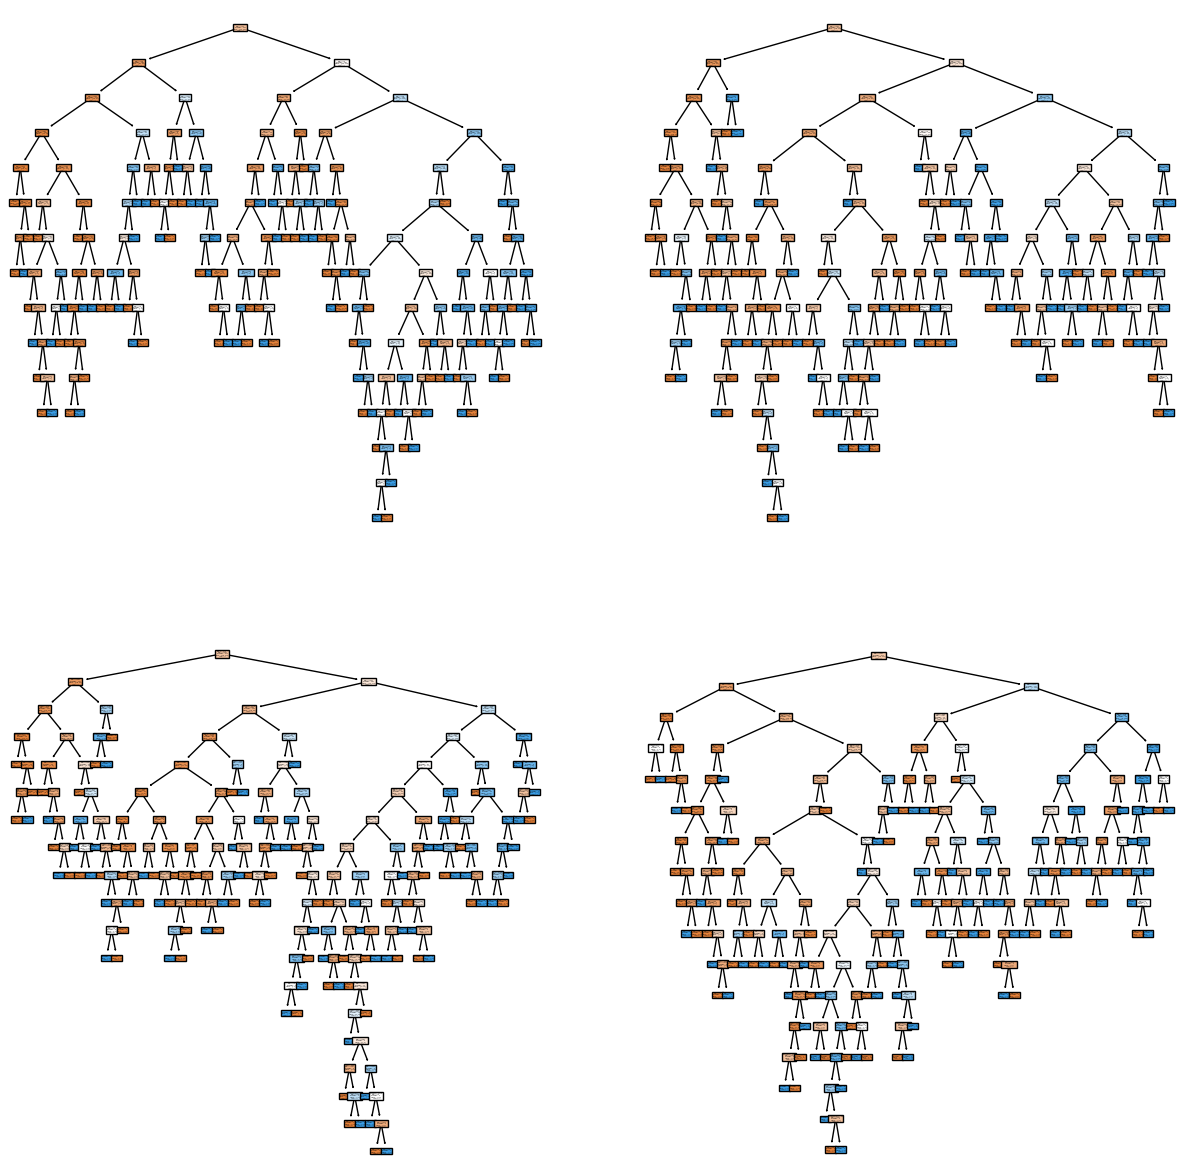

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

OBSERVAMOS QUE EL RANDOM FOREST SIN OPTIMIZAR OBTIENE MEJORES RESULTADO QUE EL OPTIMIZADO

VAMOS A PROBAR OPTIMIZAR EL RANDOM FOREST

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

hyperparams = {
    'n_estimators': [7, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid2 = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 20)
grid2

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=12),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [7, 10, 20]},
             scoring='accuracy')

In [49]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
grid2.fit(X_train, y_train)

print(f"Best hyperparameters: {grid2.best_params_}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}


In [50]:
model1 = RandomForestClassifier(bootstrap= True, max_depth = 5, max_features = "sqrt", min_samples_leaf = 1, min_samples_split =10, random_state = 12, n_estimators=20)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=20,
                       random_state=12)

In [51]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.7402597402597403

obtengo el mismo resultado con los parametros optimizados

In [60]:
from pickle import dump

dump(model, open("../models/tree_optimized.sav", "wb"))